<a href="https://colab.research.google.com/github/Dracomp89/Eduardo-Phillips---202115611/blob/main/Tarea_3/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto 5 Integración

In [2]:
import numpy as np

# Definir la función a integrar
def f(x):
    return np.exp(-x**2)

# Método del trapecio compuesto
def metodo_trapecio(f, a, b, n):
    h = (b - a) / n
    suma = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        suma += f(a + i * h)
    return h * suma

# Parámetros de la integral
a = 0
b = 1
error_tolerado = 0.005

# Calcular n usando la fórmula del error del trapecio
def calcular_n_trapecio(f, a, b, error_tolerado):
    # Segunda derivada de la función e^(-x^2) es compleja, aproximaremos
    # Usamos la cota de la segunda derivada de e^(-x^2) en [a, b] => |f''(x)| ≤ 2 en este caso
    K = 2
    n = np.ceil(np.sqrt((K * (b - a)**3) / (12 * error_tolerado)))
    return int(n)

# Calcular el número de puntos necesario
n = calcular_n_trapecio(f, a, b, error_tolerado)

# Calcular la integral usando el método del trapecio
resultado = metodo_trapecio(f, a, b, n)
n, resultado

(6, 0.7451194124361793)

Punto 6

In [3]:
import numpy as np

# Definir los valores dados
R = 0.5  # radio al centro del toroide en cm
a = 0.01  # radio de la sección transversal del toroide en cm

# Definir la función a integrar
def f(x, a, R):
    return np.sqrt(a**2 - x**2) / (R + x)

# Implementar el método del trapecio
def metodo_trapecio(f, a, b, N, a_param, R_param):
    x = np.linspace(a, b, N+1)
    y = f(x, a_param, R_param)
    h = (b - a) / N
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

# Implementar la regla de Simpson 1/3
def regla_simpson(f, a, b, N, a_param, R_param):
    if N % 2 == 1:  # Simpson requiere un número par de intervalos
        N += 1
    x = np.linspace(a, b, N+1)
    y = f(x, a_param, R_param)
    h = (b - a) / N
    integral = (h / 3) * (y[0] + 4 * np.sum(y[1:N:2]) + 2 * np.sum(y[2:N-1:2]) + y[-1])
    return integral

# Definir los parámetros de la integración
a_lim = -a  # Límite inferior
b_lim = a  # Límite superior
N = 1000  # Número de intervalos para la integración (ajustable)

# Calcular la integral utilizando ambos métodos
integral_trapecio = metodo_trapecio(f, a_lim, b_lim, N, a, R)
integral_simpson = regla_simpson(f, a_lim, b_lim, N, a, R)

# Mostrar los resultados
print(f"Resultado con el método del trapecio: {integral_trapecio:.6f}")
print(f"Resultado con la regla de Simpson 1/3: {integral_simpson:.6f}")


Resultado con el método del trapecio: 0.000314
Resultado con la regla de Simpson 1/3: 0.000314


Punto 7

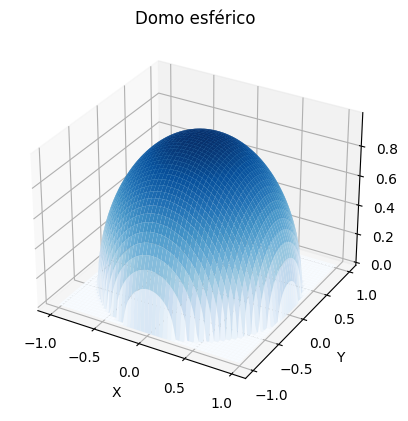

Volumen aproximado de la semiesfera: 2.09370845010818


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
R = 1  # Radio de la semiesfera
n = 100  # Número de divisiones en cada eje

# Crear la grilla entre -R y R
x = np.linspace(-R, R, n)
y = np.linspace(-R, R, n)
X, Y = np.meshgrid(x, y)

# Definir la función f(x, y) que describe la semiesfera
def f(x, y):
    z = np.zeros_like(x)  # Inicializar con ceros
    inside = x**2 + y**2 <= R**2  # Máscara para puntos dentro de la semiesfera
    z[inside] = np.sqrt(R**2 - x[inside]**2 - y[inside]**2)  # Calcular solo para los puntos dentro
    return z

# Calcular los valores de Z
Z = f(X, Y)

# Gráfica 3D de la semiesfera
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='Blues')

# Etiquetas
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Domo esférico')

plt.show()

# Calcular el volumen aproximado mediante el método del trapecio
dx = (2 * R) / (n - 1)  # Tamaño del paso en x
dy = (2 * R) / (n - 1)  # Tamaño del paso en y
volumen = np.sum(Z) * dx * dy  # Integral aproximada

print(f"Volumen aproximado de la semiesfera: {volumen}")



Punto 9

In [8]:
import sympy as sp

# Definir variables simbólicas
x, a, b = sp.symbols('x a b')
h = (b - a) / 3

# Definir los puntos de la discretización {a, a+h, a+2h, b}
x0 = a
x1 = a + h
x2 = a + 2*h
x3 = b

# Definir las funciones cardinales de Lagrange de orden 3
l0 = ((x - x1)*(x - x2)*(x - x3)) / ((x0 - x1)*(x0 - x2)*(x0 - x3))
l1 = ((x - x0)*(x - x2)*(x - x3)) / ((x1 - x0)*(x1 - x2)*(x1 - x3))
l2 = ((x - x0)*(x - x1)*(x - x3)) / ((x2 - x0)*(x2 - x1)*(x2 - x3))
l3 = ((x - x0)*(x - x1)*(x - x2)) / ((x3 - x0)*(x3 - x1)*(x3 - x2))

# Mostrar las funciones cardinales
print("Función cardinal l0:", sp.simplify(l0))
print("Función cardinal l1:", sp.simplify(l1))
print("Función cardinal l2:", sp.simplify(l2))
print("Función cardinal l3:", sp.simplify(l3))

# Definir el polinomio interpolador P(x)
f0, f1, f2, f3 = sp.symbols('f0 f1 f2 f3')
P = f0*l0 + f1*l1 + f2*l2 + f3*l3

# Mostrar el polinomio interpolador simplificado
print("\nPolinomio interpolador P(x):", sp.simplify(P))

# Integrar el polinomio interpolador P(x) en el intervalo [a, b]
integral = sp.integrate(P, (x, a, b))
print("\nIntegral simbólica de P(x) en [a, b]:", integral)

# Sustituir h = (b - a) / 3 y verificar la fórmula de Simpson 3/8
f0_subs = sp.symbols('f(a)')
f1_subs = sp.symbols('f((2a+b)/3)')
f2_subs = sp.symbols('f((a+2b)/3)')
f3_subs = sp.symbols('f(b)')
simpson_38 = integral.subs({f0: f0_subs, f1: f1_subs, f2: f2_subs, f3: f3_subs})
print("\nFórmula de Simpson 3/8:", sp.simplify(simpson_38))


Función cardinal l0: -(b - x)*(a + 2*b - 3*x)*(2*a + b - 3*x)/(2*(a - b)**3)
Función cardinal l1: 9*(a - x)*(b - x)*(a + 2*b - 3*x)/(2*(a - b)**3)
Función cardinal l2: -9*(a - x)*(b - x)*(2*a + b - 3*x)/(2*(a - b)**3)
Función cardinal l3: (a - x)*(a + 2*b - 3*x)*(2*a + b - 3*x)/(2*(a - b)**3)

Polinomio interpolador P(x): (-f0*(b - x)*(a + 2*b - 3*x)*(2*a + b - 3*x) + 9*f1*(a - x)*(b - x)*(a + 2*b - 3*x) - 9*f2*(a - x)*(b - x)*(2*a + b - 3*x) + f3*(a - x)*(a + 2*b - 3*x)*(2*a + b - 3*x))/(2*(a - b)**3)

Integral simbólica de P(x) en [a, b]: -a**4*(9*f0 - 27*f1 + 27*f2 - 9*f3)/(8*a**3 - 24*a**2*b + 24*a*b**2 - 8*b**3) - a**3*(-3*a*f0 + 12*a*f1 - 15*a*f2 + 6*a*f3 - 6*b*f0 + 15*b*f1 - 12*b*f2 + 3*b*f3)/(2*a**3 - 6*a**2*b + 6*a*b**2 - 2*b**3) - a**2*(2*a**2*f0 - 9*a**2*f1 + 18*a**2*f2 - 11*a**2*f3 + 14*a*b*f0 - 54*a*b*f1 + 54*a*b*f2 - 14*a*b*f3 + 11*b**2*f0 - 18*b**2*f1 + 9*b**2*f2 - 2*b**2*f3)/(4*a**3 - 12*a**2*b + 12*a*b**2 - 4*b**3) - a*(2*a**3*f3 - 2*a**2*b*f0 + 9*a**2*b*f1 - 18*a**2*b

Punto 10

In [9]:
import sympy as sp

# Definir las variables simbólicas
x, h = sp.symbols('x h')

# Definir la función a integrar: x(x - h)(x - 2h)(x - 3h)
f = x * (x - h) * (x - 2*h) * (x - 3*h)

# Calcular la integral en el intervalo [0, 3h]
I = sp.integrate(f, (x, 0, 3*h))

# Mostrar el resultado de la integral
print("Resultado de la integral I:", I)

# Simplificar el resultado
I_simplificado = sp.simplify(I)
print("\nResultado simplificado de la integral I:", I_simplificado)

# Ahora calculamos el error asociado a la regla de Simpson 3/8
error = -(3 / 80) * h**5 * sp.symbols('f4')  # f4 representa f^(4)(ξ)

# Mostrar el error de la regla de Simpson 3/8
print("\nError de la regla de Simpson 3/8:", error)


Resultado de la integral I: -9*h**5/10

Resultado simplificado de la integral I: -9*h**5/10

Error de la regla de Simpson 3/8: -0.0375*f4*h**5


Punto 15

In [13]:
import numpy as np

# Función para calcular los ceros y pesos de los polinomios de Legendre
def legendre_zeros_and_weights(n):
    # Usamos la función leggauss de numpy para obtener ceros y pesos
    puntos, pesos = np.polynomial.legendre.leggauss(n)
    return puntos, pesos

# Calcular los ceros y los pesos para los primeros 20 polinomios de Legendre
for n in range(1, 21):
    ceros, pesos = legendre_zeros_and_weights(n)

    print(f"Polinomio de Legendre de grado {n}:")
    print(f"Ceros: {ceros}")
    print(f"Pesos: {pesos}\n")



Polinomio de Legendre de grado 1:
Ceros: [0.]
Pesos: [2.]

Polinomio de Legendre de grado 2:
Ceros: [-0.57735027  0.57735027]
Pesos: [1. 1.]

Polinomio de Legendre de grado 3:
Ceros: [-0.77459667  0.          0.77459667]
Pesos: [0.55555556 0.88888889 0.55555556]

Polinomio de Legendre de grado 4:
Ceros: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Pesos: [0.34785485 0.65214515 0.65214515 0.34785485]

Polinomio de Legendre de grado 5:
Ceros: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Pesos: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]

Polinomio de Legendre de grado 6:
Ceros: [-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
Pesos: [0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]

Polinomio de Legendre de grado 7:
Ceros: [-0.94910791 -0.74153119 -0.40584515  0.          0.40584515  0.74153119
  0.94910791]
Pesos: [0.12948497 0.27970539 0.38183005 0.41795918 0.38183005 0.27970539
 0.12948497]

Polinomio de Leg

Punto 16

In [14]:
import numpy as np

# Función a integrar en [0, 1]
def f1(x):
    return 1 / (x**4 + 1)

# Función a integrar en [1, ∞], que ahora está en [0, 1] tras el cambio de variable
def f2(t):
    return t**3 / (1 + t**4)

# Obtener los puntos y pesos de la cuadratura de Gauss-Legendre
n = 10  # Grado de la cuadratura de Gauss-Legendre
puntos, pesos = np.polynomial.legendre.leggauss(n)

# Cambiar los puntos y pesos para el intervalo [0, 1] en lugar de [-1, 1]
puntos_01 = 0.5 * (puntos + 1)  # Transformar los puntos a [0, 1]
pesos_01 = 0.5 * pesos          # Los pesos también deben ajustarse

# Estimar la integral en [0, 1] usando la cuadratura de Gauss-Legendre
integral1 = sum(pesos_01 * f1(puntos_01))
integral2 = sum(pesos_01 * f2(puntos_01))

# Resultado final de la integral completa
resultado_final = integral1 + integral2
print(f"Resultado aproximado de la integral: {resultado_final}")


Resultado aproximado de la integral: 1.040259782448851


Punto 17

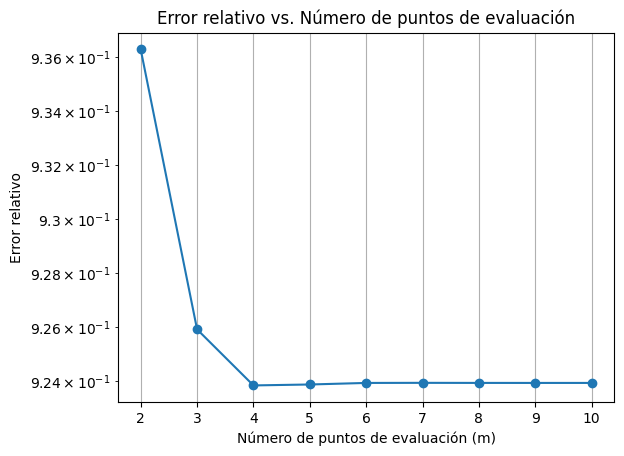

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_laguerre

# Función a integrar
def integrand(x):
    return x**3 / (np.exp(x) - 1)

# Integral exacta
I_exact = np.pi**4 / 15

# Función para calcular la integral usando Gauss-Laguerre
def gauss_laguerre_integral(m):
    nodes, weights = roots_laguerre(m)
    integral = np.sum(weights * integrand(nodes))
    return integral

# Calcular el error relativo
def relative_error(I_exact, I_approx):
    return np.abs(I_exact - I_approx) / I_exact

# Valores de m para evaluar
m_values = np.arange(2, 11)
errors = []

# Calcular la integral y el error relativo para cada m
for m in m_values:
    I_approx = gauss_laguerre_integral(m)
    error = relative_error(I_exact, I_approx)
    errors.append(error)

# Graficar el error relativo
plt.plot(m_values, errors, marker='o')
plt.xlabel('Número de puntos de evaluación (m)')
plt.ylabel('Error relativo')
plt.title('Error relativo vs. Número de puntos de evaluación')
plt.yscale('log')  # Usar escala logarítmica si es necesario
plt.grid(True)
plt.show()



Punto 21

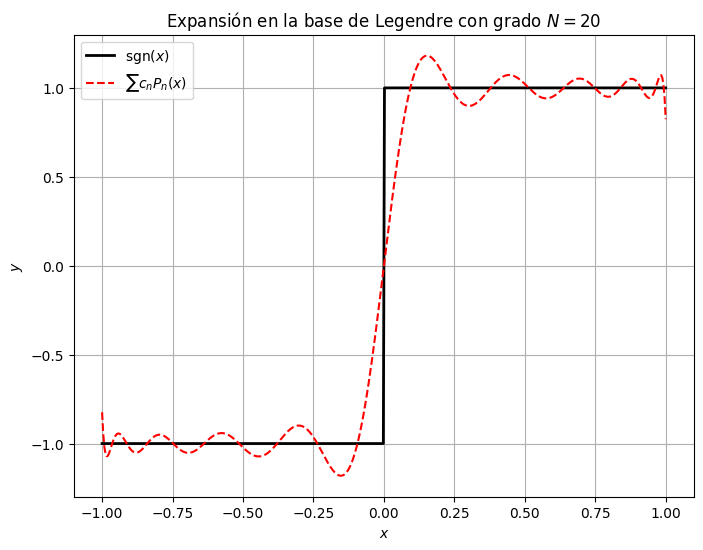

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad

# Definir la función sgn(x)
def sgn(x):
    return np.where(x < 0, -1, np.where(x > 0, 1, 0))

# Definir la función para calcular los coeficientes c_n
def coeficiente_cn(n):
    Pn = legendre(n)  # Polinomio de Legendre de grado n
    integrand = lambda x: sgn(x) * Pn(x)  # Integrando para c_n
    integral, _ = quad(integrand, -1, 1)  # Integral numérica
    return (2 * n + 1) / 2 * integral  # Fórmula para c_n

# Crear los polinomios de Legendre y calcular la combinación lineal
def aproximar_sgn(x, N):
    sgn_approx = np.zeros_like(x)
    for n in range(N + 1):
        Pn = legendre(n)  # Polinomio de Legendre de grado n
        cn = coeficiente_cn(n)  # Calcular coeficiente
        sgn_approx += cn * Pn(x)  # Sumar a la combinación lineal
    return sgn_approx

# Definir los puntos para x
x = np.linspace(-1, 1, 500)

# Aproximar la función sgn(x) con polinomios de Legendre de grado N = 20
N = 20
sgn_aprox = aproximar_sgn(x, N)

# Graficar la función original sgn(x) y la aproximación
plt.figure(figsize=(8, 6))
plt.plot(x, sgn(x), label=r'$\mathrm{sgn}(x)$', color='black', lw=2)
plt.plot(x, sgn_aprox, label=r'$\sum c_n P_n(x)$', color='red', linestyle='--')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Expansión en la base de Legendre con grado $N = 20$')
plt.legend()
plt.grid(True)
plt.show()

